In [53]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv(filepath_or_buffer="original_data.csv", sep=",", on_bad_lines="warn")
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [56]:
df = df.drop(columns="Unnamed: 0")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251079 non-null  object 
 1   model                     251079 non-null  object 
 2   color                     250913 non-null  object 
 3   registration_date         251075 non-null  object 
 4   year                      251079 non-null  object 
 5   price_in_euro             251079 non-null  object 
 6   power_kw                  250945 non-null  object 
 7   power_ps                  250950 non-null  object 
 8   transmission_type         251079 non-null  object 
 9   fuel_type                 251079 non-null  object 
 10  fuel_consumption_l_100km  224206 non-null  object 
 11  fuel_consumption_g_km     251079 non-null  object 
 12  mileage_in_km             250927 non-null  float64
 13  offer_description         251078 non-null  o

In [57]:
df = df.dropna(subset=['offer_description'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251078 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251078 non-null  object 
 1   model                     251078 non-null  object 
 2   color                     250912 non-null  object 
 3   registration_date         251074 non-null  object 
 4   year                      251078 non-null  object 
 5   price_in_euro             251078 non-null  object 
 6   power_kw                  250944 non-null  object 
 7   power_ps                  250949 non-null  object 
 8   transmission_type         251078 non-null  object 
 9   fuel_type                 251078 non-null  object 
 10  fuel_consumption_l_100km  224205 non-null  object 
 11  fuel_consumption_g_km     251078 non-null  object 
 12  mileage_in_km             250927 non-null  float64
 13  offer_description         251078 non-null  o

In [58]:
df = df.dropna(subset=['mileage_in_km'])
df['mileage_in_km'] = df['mileage_in_km'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250927 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   brand                     250927 non-null  object
 1   model                     250927 non-null  object
 2   color                     250761 non-null  object
 3   registration_date         250927 non-null  object
 4   year                      250927 non-null  object
 5   price_in_euro             250927 non-null  object
 6   power_kw                  250795 non-null  object
 7   power_ps                  250801 non-null  object
 8   transmission_type         250927 non-null  object
 9   fuel_type                 250927 non-null  object
 10  fuel_consumption_l_100km  224066 non-null  object
 11  fuel_consumption_g_km     250927 non-null  object
 12  mileage_in_km             250927 non-null  int32 
 13  offer_description         250927 non-null  object
dtypes: i

In [59]:
df['color'].fillna('unknown', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250927 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   brand                     250927 non-null  object
 1   model                     250927 non-null  object
 2   color                     250927 non-null  object
 3   registration_date         250927 non-null  object
 4   year                      250927 non-null  object
 5   price_in_euro             250927 non-null  object
 6   power_kw                  250795 non-null  object
 7   power_ps                  250801 non-null  object
 8   transmission_type         250927 non-null  object
 9   fuel_type                 250927 non-null  object
 10  fuel_consumption_l_100km  224066 non-null  object
 11  fuel_consumption_g_km     250927 non-null  object
 12  mileage_in_km             250927 non-null  int32 
 13  offer_description         250927 non-null  object
dtypes: i

In [60]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'LPG', 'Other', '07/2004', '06/2014',
       'CNG', 'Diesel Hybrid', '12/2016', 'Electric', '12/2019',
       'Unknown', '06/2023', 'Ethanol', '264.000 km', '05/2009',
       '180.000 km', '04/2013', '03/2014', '08/2014', '01/2016',
       '03/2017', 'Manual', '04/2008', '07/2007', '12/2012', '10/2022',
       '06/2004', '09/2009', '12/2014', '02/2017', '11/2018', '08/2018',
       '03/2019', '11/2021', 'Hydrogen', '07/2022', '05/2015', '03/2018',
       '04/2022', '02/1996', '04/2000', '06/2009', '05/2012', '11/2014',
       '10/2015', 'Automatic', '03/2021', '26890', '26990', '11/2005',
       '07/2005', '08/2011', '02/2011', '03/2011', '10/2013', '09/2015',
       '02/2018', '02/2023', '08/2017', '99.900 km', '13.610 km',
       '9.900 km', '01/2021', '05/2021', '08/2013', '02/2013', '04/2017',
       '11/2017', '01/2022', '05/2023', '02/2009', '09/2019', '08/2019',
       '11/2022', '04/2023', '03/2023', '01/2023', '07/1999', '02/2002',
       '

In [61]:
valid_fuel_types = ['Petrol', 'Diesel', 'Hybrid', 'LPG', 'Other', 'CNG', 'Diesel Hybrid', 'Electric', 'Unknown', 'Ethanol', 'Hydrogen']
df = df[df['fuel_type'].isin(valid_fuel_types)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250818 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   brand                     250818 non-null  object
 1   model                     250818 non-null  object
 2   color                     250818 non-null  object
 3   registration_date         250818 non-null  object
 4   year                      250818 non-null  object
 5   price_in_euro             250818 non-null  object
 6   power_kw                  250692 non-null  object
 7   power_ps                  250692 non-null  object
 8   transmission_type         250818 non-null  object
 9   fuel_type                 250818 non-null  object
 10  fuel_consumption_l_100km  223957 non-null  object
 11  fuel_consumption_g_km     250818 non-null  object
 12  mileage_in_km             250818 non-null  int32 
 13  offer_description         250818 non-null  object
dtypes: i

In [62]:
df['brand'].unique()

array(['alfa-romeo', 'aston-martin', 'audi', 'bentley', 'bmw', 'cadillac',
       'chevrolet', 'chrysler', 'citroen', 'dacia', 'daewoo', 'daihatsu',
       'dodge', 'ferrari', 'fiat', 'ford', 'honda', 'hyundai', 'infiniti',
       'isuzu', 'jaguar', 'jeep', 'kia', 'lada', 'lamborghini', 'lancia',
       'land-rover', 'maserati', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 'proton',
       'renault', 'rover', 'saab', 'seat', 'skoda', 'smart', 'ssangyong',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [63]:
df['model'].unique()

array(['Alfa Romeo GTV', 'Alfa Romeo 164', 'Alfa Romeo Spider', ...,
       'Volvo XC40', 'Volvo C40', 'Volvo'], dtype=object)

In [64]:
df['color'].unique()

array(['red', 'black', 'silver', 'grey', 'white', 'beige', 'blue',
       'green', 'yellow', 'gold', 'brown', 'bronze', 'violet', 'orange',
       'unknown'], dtype=object)

In [65]:
df['year'].unique()

array(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [66]:
df['year'] = df['year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250818 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   brand                     250818 non-null  object
 1   model                     250818 non-null  object
 2   color                     250818 non-null  object
 3   registration_date         250818 non-null  object
 4   year                      250818 non-null  int32 
 5   price_in_euro             250818 non-null  object
 6   power_kw                  250692 non-null  object
 7   power_ps                  250692 non-null  object
 8   transmission_type         250818 non-null  object
 9   fuel_type                 250818 non-null  object
 10  fuel_consumption_l_100km  223957 non-null  object
 11  fuel_consumption_g_km     250818 non-null  object
 12  mileage_in_km             250818 non-null  int32 
 13  offer_description         250818 non-null  object
dtypes: i

In [67]:
df['transmission_type'].unique()

array(['Manual', 'Unknown', 'Automatic', 'Semi-automatic'], dtype=object)

In [68]:
df['price_in_euro'] = df['year'].astype(float)
df['brand'] = df['brand'].astype(str)
df['model'] = df['model'].astype(str)
df['color'] = df['color'].astype(str)
df['transmission_type'] = df['transmission_type'].astype(str)
df['fuel_type'] = df['fuel_type'].astype(str)
df['offer_description'] = df['offer_description'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250818 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     250818 non-null  object 
 1   model                     250818 non-null  object 
 2   color                     250818 non-null  object 
 3   registration_date         250818 non-null  object 
 4   year                      250818 non-null  int32  
 5   price_in_euro             250818 non-null  float64
 6   power_kw                  250692 non-null  object 
 7   power_ps                  250692 non-null  object 
 8   transmission_type         250818 non-null  object 
 9   fuel_type                 250818 non-null  object 
 10  fuel_consumption_l_100km  223957 non-null  object 
 11  fuel_consumption_g_km     250818 non-null  object 
 12  mileage_in_km             250818 non-null  int32  
 13  offer_description         250818 non-null  o

In [69]:
ps_empty = df[df['power_ps'].isna()]
ps_empty.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
1396,alfa-romeo,Alfa Romeo Tonale,black,01/2023,2023,2023.0,NaN,NaN,Automatic,Petrol,"5,9 l/100 km",134 g/km,15,SUPER 1.5 T 130PS 48-Hybrid 15KW
1417,alfa-romeo,Alfa Romeo Tonale,black,01/2023,2023,2023.0,NaN,NaN,Automatic,Hybrid,"5,9 l/100 km",134 g/km,5,SUPER 1.5 T 130PS 48-Hybrid 15KW
1961,audi,Audi TT,silver,07/2001,2001,2001.0,NaN,NaN,Manual,Other,NaN,- (g/km),154920,Roadster 1.8T quattro Mokassin-Naht
19299,audi,Audi RS6,silver,06/2020,2020,2020.0,NaN,NaN,Automatic,Petrol,"11,7 l/100 km",268 g/km,29874,Avant 4.0 TFSI quat/1064ps*/HGP/Keramik/VOLL
20371,audi,Audi A6,silver,03/2021,2021,2021.0,NaN,NaN,Automatic,Diesel,"4,9 l/100 km",128 g/km,74373,Avant design 40 TDI Aut quatt CAM AHK LED


In [70]:
ps_empty["fuel_type"].value_counts()

Petrol      47
Hybrid      27
Diesel      25
Electric    12
Unknown      8
Other        5
Hydrogen     2
Name: fuel_type, dtype: int64

In [71]:
df = df.dropna(subset=['power_ps'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250692 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     250692 non-null  object 
 1   model                     250692 non-null  object 
 2   color                     250692 non-null  object 
 3   registration_date         250692 non-null  object 
 4   year                      250692 non-null  int32  
 5   price_in_euro             250692 non-null  float64
 6   power_kw                  250692 non-null  object 
 7   power_ps                  250692 non-null  object 
 8   transmission_type         250692 non-null  object 
 9   fuel_type                 250692 non-null  object 
 10  fuel_consumption_l_100km  223883 non-null  object 
 11  fuel_consumption_g_km     250692 non-null  object 
 12  mileage_in_km             250692 non-null  int32  
 13  offer_description         250692 non-null  o

In [72]:
df["fuel_consumption_l_100km"].head()

0    10,9 l/100 km
1              NaN
2              NaN
3     9,5 l/100 km
4     7,2 l/100 km
Name: fuel_consumption_l_100km, dtype: object

In [73]:
df['fuel_consumption_l_100km'].value_counts()

4,9 l/100 km       8148
5,1 l/100 km       7653
5,5 l/100 km       7610
5,9 l/100 km       7513
5,3 l/100 km       7430
                   ... 
594 km (Ort)          1
464 km (Ort)          1
687 km (Ort)          1
12,6 kWh/100 km       1
93 km (Ort)           1
Name: fuel_consumption_l_100km, Length: 531, dtype: int64

Merkwürdige Werte mit "Ort" -> Welche Spalte, die Verbrauch beschreibt, verwenden?

In [74]:
dirty_data = df[df['fuel_consumption_l_100km'].str.contains('\(Ort\)', na=False)]
dirty_data["fuel_consumption_g_km"].unique()

array(['391 km Reichweite', '46 km Reichweite', '327 km Reichweite',
       '484 km Reichweite', '100 km Reichweite', '247 km Reichweite',
       '304 km Reichweite', '303 km Reichweite', '279 km Reichweite',
       '306 km Reichweite', '280 km Reichweite', '283 km Reichweite',
       '282 km Reichweite', '288 km Reichweite', '307 km Reichweite',
       '300 km Reichweite', '281 km Reichweite', '284 km Reichweite',
       '308 km Reichweite', '51 km Reichweite', '289 km Reichweite',
       '359 km Reichweite', '453 km Reichweite', '570 km Reichweite',
       '458 km Reichweite', '56 km Reichweite', '499 km Reichweite',
       '574 km Reichweite', '502 km Reichweite', '592 km Reichweite',
       '545 km Reichweite', '399 km Reichweite', '417 km Reichweite',
       '398 km Reichweite', '533 km Reichweite', '91 km Reichweite',
       '598 km Reichweite', '425 km Reichweite', '547 km Reichweite',
       '433 km Reichweite', '406 km Reichweite', '348 km Reichweite',
       '346 km Reichweit

Alle Datensätze, die das Stichwort "Ort" enthalten, enthalten auch "Reichweite" in der Spalte "g_km"

In [75]:
dirty_data["fuel_type"].value_counts()

Electric         343
Hybrid           137
Other              7
Diesel Hybrid      2
Name: fuel_type, dtype: int64

Die meisten sind Elektro oder Hybridautos 

In [76]:
df["fuel_type"].value_counts()

Petrol           143204
Diesel            86394
Hybrid            12572
Electric           5944
LPG                1243
CNG                 508
Diesel Hybrid       476
Other               173
Unknown              88
Hydrogen             80
Ethanol              10
Name: fuel_type, dtype: int64

In [77]:
df[df['fuel_type'] == 'Electric']["fuel_consumption_g_km"].value_counts()

0 g/km               2919
200 km Reichweite     176
230 km Reichweite     117
400 km Reichweite      70
340 km Reichweite      69
                     ... 
710 km Reichweite       1
426 km Reichweite       1
151 km Reichweite       1
262 km Reichweite       1
548 km Reichweite       1
Name: fuel_consumption_g_km, Length: 382, dtype: int64

Die meisten Einträge haben keine Daten, somit ist es schwer eine neue Spalte "Reichweite" einzuführen

In [78]:
df[df['fuel_type'] == 'Hybrid']["fuel_consumption_g_km"].value_counts()

- (g/km)             1131
64 g/km               317
92 g/km               316
86 g/km               286
0 g/km                262
                     ... 
198 g/km                1
214 g/km                1
420 km Reichweite       1
204 g/km                1
77 km Reichweite        1
Name: fuel_consumption_g_km, Length: 315, dtype: int64

Bei den Hybridautos scheint es anders auszusehen, viele haben realistische Werte. Eine Großzahl aber auch keine Werte

In [79]:
mask = df['fuel_consumption_g_km'].str.contains('Reichweite', na=False)
df.loc[mask, 'fuel_consumption_g_km'] = 0.0
df[df['fuel_type'] == 'Electric']["fuel_consumption_g_km"].value_counts()

0.0             2997
0 g/km          2919
-/-               16
122 g/km           2
13 g/km            1
460 km (Ort)       1
389 km (Ort)       1
152 g/km           1
60 g/km            1
85 km (Ort)        1
90 km (Ort)        1
235 km (Ort)       1
100 km (Ort)       1
230 km (Ort)       1
Name: fuel_consumption_g_km, dtype: int64

In [80]:
mask = df['fuel_consumption_g_km'].str.contains('(Ort)', na=False)
df.loc[mask, 'fuel_consumption_g_km'] = 0.0
df[df['fuel_type'] == 'Electric']["fuel_consumption_g_km"].value_counts()

c:\Users\jog97\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


0.0         3004
0 g/km      2919
-/-           16
122 g/km       2
13 g/km        1
152 g/km       1
60 g/km        1
Name: fuel_consumption_g_km, dtype: int64

In [81]:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].str.replace('g/km', '', regex=False)
df['fuel_consumption_g_km'].value_counts()

- ()      35778
0          8511
119        4810
114        3877
139        3382
          ...  
136,9         1
5,7           1
135,8         1
119,5         1
194,3         1
Name: fuel_consumption_g_km, Length: 1014, dtype: int64

In [82]:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].str.replace(',', '.', regex=False)
df['fuel_consumption_g_km'].value_counts()

- ()      35778
0          8511
119        4810
114        3877
139        3382
          ...  
136.9         1
5.7           1
135.8         1
119.5         1
194.3         1
Name: fuel_consumption_g_km, Length: 1014, dtype: int64

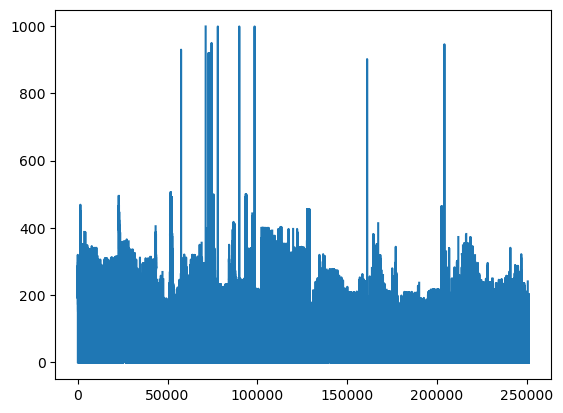

In [83]:
test = pd.to_numeric(df['fuel_consumption_g_km'], errors='coerce')
test.plot()

## Liter pro 100 Kilometer

In [84]:
df['fuel_consumption_l_100km'].value_counts()

4,9 l/100 km       8148
5,1 l/100 km       7653
5,5 l/100 km       7610
5,9 l/100 km       7513
5,3 l/100 km       7430
                   ... 
594 km (Ort)          1
464 km (Ort)          1
687 km (Ort)          1
12,6 kWh/100 km       1
93 km (Ort)           1
Name: fuel_consumption_l_100km, Length: 531, dtype: int64

In [85]:
mask = df['fuel_consumption_l_100km'].str.contains('Ort', na=False)
df.loc[mask, 'fuel_consumption_l_100km'] = 0.0
df['fuel_consumption_l_100km'].value_counts()

4,9 l/100 km      8148
5,1 l/100 km      7653
5,5 l/100 km      7610
5,9 l/100 km      7513
5,3 l/100 km      7430
                  ... 
8,3 kg/100 km        1
14,7 kg/100 km       1
98,4 l/100 km        1
152 l/100 km         1
22,6 l/100 km        1
Name: fuel_consumption_l_100km, Length: 346, dtype: int64

In [86]:
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(' l/100 km', '', regex=False)
df['fuel_consumption_l_100km'].value_counts()

4,9               8148
5,1               7653
5,5               7610
5,9               7513
5,3               7430
                  ... 
8,3 kg/100 km        1
14,7 kg/100 km       1
98,4                 1
152                  1
22,6                 1
Name: fuel_consumption_l_100km, Length: 345, dtype: int64

In [87]:
import numpy as np
df.loc[df['fuel_consumption_l_100km'].str.contains(' kg/100 km', na=False), 'fuel_consumption_l_100km'] = np.nan
df['fuel_consumption_l_100km'].unique()

array(['10,9', nan, '9,5', '7,2', '8,8', '13,4', '11', '9,2', '11,1',
       '11,7', '8,4', '8,2', '8,9', '11,4', '8,5', '8,3', '7,9', '8,7',
       '8,1', '12,2', '12', '5,8', '10', '6,7', '8,6', '12,5', '9,7',
       '12,1', '8', '7,5', '6,2', '13,2', '6', '12,4', '6,8', '9,4',
       '6,1', '5,9', '11,5', '11,6', '7,6', '5,2', '7,1', '6,9', '12,3',
       '6,5', '7,7', '4,6', '4,8', '4,5', '5,3', '6,4', '4,9', '6,6',
       '5,5', '5,4', '5,6', '16,8', '5,7', '3,5', '4,4', '4,7', '4',
       '4,2', '- (l/100 km)', '7', '4,3', '5,1', '3,4', '3,9', '3,8', '9',
       '9,8', '10,3', '7,4', '7,8', '6,3', '10,1', '5', '9,3', '7,3',
       '10,8', '0', '11,8', '1,3', '1,4', '9,1', '9,6', '10,2', '1,5',
       '12,7', '16,5', '14,7', '16,7', '18,8', '14,6', '17,8', '17,2',
       '18,9', '15', '13,8', '18,7', '16,4', '15,6', '18,2', '18', '14',
       '14,9', '13,9', '15,5', '12,6', '14,4', '12,9', '14,3', '17',
       '12,8', '13,1', '9,9', '10,5', '14,2', '13,5', '10,6', '16,9',
       '

In [88]:
import numpy as np
df.loc[df['fuel_consumption_l_100km'].str.contains(' kWh/100 km', na=False), 'fuel_consumption_l_100km'] = np.nan
df['fuel_consumption_l_100km'].unique()

array(['10,9', nan, '9,5', '7,2', '8,8', '13,4', '11', '9,2', '11,1',
       '11,7', '8,4', '8,2', '8,9', '11,4', '8,5', '8,3', '7,9', '8,7',
       '8,1', '12,2', '12', '5,8', '10', '6,7', '8,6', '12,5', '9,7',
       '12,1', '8', '7,5', '6,2', '13,2', '6', '12,4', '6,8', '9,4',
       '6,1', '5,9', '11,5', '11,6', '7,6', '5,2', '7,1', '6,9', '12,3',
       '6,5', '7,7', '4,6', '4,8', '4,5', '5,3', '6,4', '4,9', '6,6',
       '5,5', '5,4', '5,6', '16,8', '5,7', '3,5', '4,4', '4,7', '4',
       '4,2', '- (l/100 km)', '7', '4,3', '5,1', '3,4', '3,9', '3,8', '9',
       '9,8', '10,3', '7,4', '7,8', '6,3', '10,1', '5', '9,3', '7,3',
       '10,8', '0', '11,8', '1,3', '1,4', '9,1', '9,6', '10,2', '1,5',
       '12,7', '16,5', '14,7', '16,7', '18,8', '14,6', '17,8', '17,2',
       '18,9', '15', '13,8', '18,7', '16,4', '15,6', '18,2', '18', '14',
       '14,9', '13,9', '15,5', '12,6', '14,4', '12,9', '14,3', '17',
       '12,8', '13,1', '9,9', '10,5', '14,2', '13,5', '10,6', '16,9',
       '

In [89]:
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(',', '.', regex=False)
df['fuel_consumption_l_100km'].unique()

array(['10.9', nan, '9.5', '7.2', '8.8', '13.4', '11', '9.2', '11.1',
       '11.7', '8.4', '8.2', '8.9', '11.4', '8.5', '8.3', '7.9', '8.7',
       '8.1', '12.2', '12', '5.8', '10', '6.7', '8.6', '12.5', '9.7',
       '12.1', '8', '7.5', '6.2', '13.2', '6', '12.4', '6.8', '9.4',
       '6.1', '5.9', '11.5', '11.6', '7.6', '5.2', '7.1', '6.9', '12.3',
       '6.5', '7.7', '4.6', '4.8', '4.5', '5.3', '6.4', '4.9', '6.6',
       '5.5', '5.4', '5.6', '16.8', '5.7', '3.5', '4.4', '4.7', '4',
       '4.2', '- (l/100 km)', '7', '4.3', '5.1', '3.4', '3.9', '3.8', '9',
       '9.8', '10.3', '7.4', '7.8', '6.3', '10.1', '5', '9.3', '7.3',
       '10.8', '0', '11.8', '1.3', '1.4', '9.1', '9.6', '10.2', '1.5',
       '12.7', '16.5', '14.7', '16.7', '18.8', '14.6', '17.8', '17.2',
       '18.9', '15', '13.8', '18.7', '16.4', '15.6', '18.2', '18', '14',
       '14.9', '13.9', '15.5', '12.6', '14.4', '12.9', '14.3', '17',
       '12.8', '13.1', '9.9', '10.5', '14.2', '13.5', '10.6', '16.9',
       '

In [90]:
df.loc[df['fuel_consumption_l_100km'].str.contains('(l/100 km)', na=False), 'fuel_consumption_l_100km'] = np.nan
df['fuel_consumption_l_100km'].value_counts()

c:\Users\jog97\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


4.9     8148
5.1     7653
5.5     7610
5.9     7513
5.3     7430
        ... 
53         1
52         1
31.4       1
152        1
22.6       1
Name: fuel_consumption_l_100km, Length: 254, dtype: int64

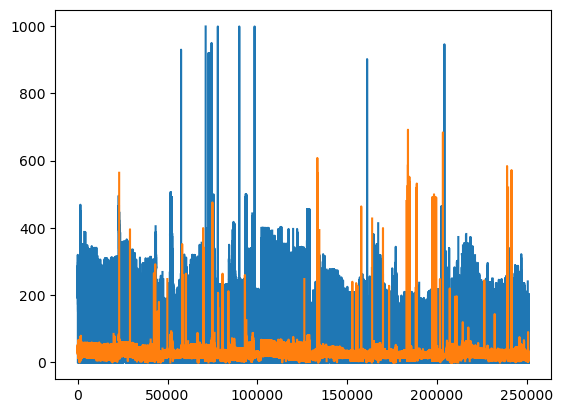

In [91]:
test2 = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')
test2 = test2*4
test.plot(label="g_km")
test2.plot(label="l_100km")
plt.show()

In [92]:
df["fuel_consumption_l_100km"].describe()

count     221740
unique       254
top          4.9
freq        8148
Name: fuel_consumption_l_100km, dtype: object

In [93]:
df["fuel_consumption_g_km"].describe()

count     246374
unique      1014
top         - ()
freq       35778
Name: fuel_consumption_g_km, dtype: object

In [94]:
df.drop("fuel_consumption_g_km", axis=1, inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250692 entries, 0 to 251078
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     250692 non-null  object 
 1   model                     250692 non-null  object 
 2   color                     250692 non-null  object 
 3   registration_date         250692 non-null  object 
 4   year                      250692 non-null  int32  
 5   price_in_euro             250692 non-null  float64
 6   power_kw                  250692 non-null  object 
 7   power_ps                  250692 non-null  object 
 8   transmission_type         250692 non-null  object 
 9   fuel_type                 250692 non-null  object 
 10  fuel_consumption_l_100km  221740 non-null  object 
 11  mileage_in_km             250692 non-null  int32  
 12  offer_description         250692 non-null  object 
dtypes: float64(1), int32(2), object(10)
memory u

In [96]:
df.dropna(subset=['fuel_consumption_l_100km'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221740 entries, 0 to 251076
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     221740 non-null  object 
 1   model                     221740 non-null  object 
 2   color                     221740 non-null  object 
 3   registration_date         221740 non-null  object 
 4   year                      221740 non-null  int32  
 5   price_in_euro             221740 non-null  float64
 6   power_kw                  221740 non-null  object 
 7   power_ps                  221740 non-null  object 
 8   transmission_type         221740 non-null  object 
 9   fuel_type                 221740 non-null  object 
 10  fuel_consumption_l_100km  221740 non-null  object 
 11  mileage_in_km             221740 non-null  int32  
 12  offer_description         221740 non-null  object 
dtypes: float64(1), int32(2), object(10)
memory u

In [97]:
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221740 entries, 0 to 251076
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     221740 non-null  object 
 1   model                     221740 non-null  object 
 2   color                     221740 non-null  object 
 3   registration_date         221740 non-null  object 
 4   year                      221740 non-null  int32  
 5   price_in_euro             221740 non-null  float64
 6   power_kw                  221740 non-null  object 
 7   power_ps                  221740 non-null  object 
 8   transmission_type         221740 non-null  object 
 9   fuel_type                 221740 non-null  object 
 10  fuel_consumption_l_100km  221740 non-null  float64
 11  mileage_in_km             221740 non-null  int32  
 12  offer_description         221740 non-null  object 
dtypes: float64(2), int32(2), object(9)
memory us

In [98]:
df['power_kw'] = pd.to_numeric(df['power_kw'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221740 entries, 0 to 251076
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     221740 non-null  object 
 1   model                     221740 non-null  object 
 2   color                     221740 non-null  object 
 3   registration_date         221740 non-null  object 
 4   year                      221740 non-null  int32  
 5   price_in_euro             221740 non-null  float64
 6   power_kw                  221740 non-null  int64  
 7   power_ps                  221740 non-null  object 
 8   transmission_type         221740 non-null  object 
 9   fuel_type                 221740 non-null  object 
 10  fuel_consumption_l_100km  221740 non-null  float64
 11  mileage_in_km             221740 non-null  int32  
 12  offer_description         221740 non-null  object 
dtypes: float64(2), int32(2), int64(1), object(8)

In [99]:
df['power_ps'] = pd.to_numeric(df['power_kw'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221740 entries, 0 to 251076
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     221740 non-null  object 
 1   model                     221740 non-null  object 
 2   color                     221740 non-null  object 
 3   registration_date         221740 non-null  object 
 4   year                      221740 non-null  int32  
 5   price_in_euro             221740 non-null  float64
 6   power_kw                  221740 non-null  int64  
 7   power_ps                  221740 non-null  int64  
 8   transmission_type         221740 non-null  object 
 9   fuel_type                 221740 non-null  object 
 10  fuel_consumption_l_100km  221740 non-null  float64
 11  mileage_in_km             221740 non-null  int32  
 12  offer_description         221740 non-null  object 
dtypes: float64(2), int32(2), int64(2), object(7)

## Dates

In [100]:
df['registration_date'].unique()

array(['10/1995', '07/1995', '11/1996', '04/1996', '12/1996', '07/1996',
       '01/1996', '02/1996', '10/1996', '05/1997', '06/1997', '10/1997',
       '03/1997', '01/1997', '02/1997', '04/1997', '07/1997', '07/1998',
       '05/1998', '01/1998', '11/1998', '09/1998', '07/1999', '02/1999',
       '06/1999', '12/1999', '04/1999', '03/1999', '10/2000', '06/2000',
       '05/2000', '04/2000', '11/2000', '03/2000', '02/2000', '09/2001',
       '02/2001', '03/2001', '01/2001', '11/2001', '12/2001', '04/2001',
       '05/2001', '06/2001', '10/2002', '12/2002', '01/2002', '09/2002',
       '11/2002', '06/2002', '03/2002', '02/2002', '05/2003', '10/2003',
       '07/2003', '02/2003', '01/2003', '08/2003', '03/2003', '06/2003',
       '03/2004', '02/2004', '09/2004', '04/2004', '08/2004', '01/2004',
       '06/2004', '10/2004', '12/2004', '11/2004', '07/2004', '05/2004',
       '10/2005', '06/2005', '07/2005', '09/2005', '01/2005', '11/2005',
       '05/2005', '08/2005', '02/2005', '02/2006', 

In [101]:
df['registration_date'] = pd.to_datetime(df['registration_date'], format='%m/%Y')
df['registration_date'].unique()

array(['1995-10-01T00:00:00.000000000', '1995-07-01T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-04-01T00:00:00.000000000',
       '1996-12-01T00:00:00.000000000', '1996-07-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-10-01T00:00:00.000000000', '1997-05-01T00:00:00.000000000',
       '1997-06-01T00:00:00.000000000', '1997-10-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
       '1997-02-01T00:00:00.000000000', '1997-04-01T00:00:00.000000000',
       '1997-07-01T00:00:00.000000000', '1998-07-01T00:00:00.000000000',
       '1998-05-01T00:00:00.000000000', '1998-01-01T00:00:00.000000000',
       '1998-11-01T00:00:00.000000000', '1998-09-01T00:00:00.000000000',
       '1999-07-01T00:00:00.000000000', '1999-02-01T00:00:00.000000000',
       '1999-06-01T00:00:00.000000000', '1999-12-01T00:00:00.000000000',
       '1999-04-01T00:00:00.000000000', '1999-03-01

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221740 entries, 0 to 251076
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   brand                     221740 non-null  object        
 1   model                     221740 non-null  object        
 2   color                     221740 non-null  object        
 3   registration_date         221740 non-null  datetime64[ns]
 4   year                      221740 non-null  int32         
 5   price_in_euro             221740 non-null  float64       
 6   power_kw                  221740 non-null  int64         
 7   power_ps                  221740 non-null  int64         
 8   transmission_type         221740 non-null  object        
 9   fuel_type                 221740 non-null  object        
 10  fuel_consumption_l_100km  221740 non-null  float64       
 11  mileage_in_km             221740 non-null  int32         
 12  of

Analysis of offer description

In [103]:
df['length_offer_description'] = df['offer_description'].str.len()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221740 entries, 0 to 251076
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   brand                     221740 non-null  object        
 1   model                     221740 non-null  object        
 2   color                     221740 non-null  object        
 3   registration_date         221740 non-null  datetime64[ns]
 4   year                      221740 non-null  int32         
 5   price_in_euro             221740 non-null  float64       
 6   power_kw                  221740 non-null  int64         
 7   power_ps                  221740 non-null  int64         
 8   transmission_type         221740 non-null  object        
 9   fuel_type                 221740 non-null  object        
 10  fuel_consumption_l_100km  221740 non-null  float64       
 11  mileage_in_km             221740 non-null  int32         
 12  of

In [105]:
df.to_csv('data.csv', index=False, quoting=csv.QUOTE_ALL)